**Bernardo José Llamas Verna (47286447B)**

# Análisis de la Demanda Eléctrica en España (2014-2021)

## 0) Introducción

Debido a las convulsiones del mercado eléctrico español en los últimos años con alta variabilidad de los precios, crecimientos históricos de los precios y el debate en torno a una transición ecológica, la motivación del presente trabajo es la de analizar el consumo de energía en el Estado Español para el período 2014-2021.

Se comenzará realizando un análisis global del consumo identificando posibles tendencias y estacionalidades para luego ir pasando a un enfoque más granular (meses en los que se concentran los picos y valles de consumo, afectan o no los días de la semana, festivos y variables exógenas como la temperatura. A continuación se estudiarán diferentes modelos de predicción (forecasting) para poder predecir consumos a futuro.

## 1) Extracción de los datos

Los datos de demanda energética que se van a emplear en el presente trabajo han sido extraídos de la API E-SIOS de Red Eléctrica, permitiendo obtener los datos de forma cómoda con diferentes intervalos de tiempo (horario, diario, mensual, anual, etc).

El proceso de extracción, limpieza y preparación están explicados en el notebook `Extraccion_Datos_Demanda Electrica.ipynb`.

In [1]:
# TODO: hacer un notebook resumen de cómo extraemos los datos de Demanda Eléctrica.

## 2) Análisis Exploratorio de datos

### Análisis Mensual

Vamos a comenzar realizando una primera aproximación de los datos a través del dataset de demanda mensual. Para ello cargamos los datos:

In [2]:
import requests
import json
import numpy as np
import datetime
import string
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
energy_demand_monthly = pd.read_csv('demanda_electrica_month.csv')

In [4]:
energy_demand_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    96 non-null     object 
 1   value   96 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Tenemos 96 registros no nulos en 2 columnas: `date` y `value`. Los valores serían del estilo:

In [5]:
energy_demand_monthly.head()

,date,value
0,2014-01-01,132056990.0
1,2014-02-01,121688438.0
2,2014-03-01,124724746.0
3,2014-04-01,112057243.0
4,2014-05-01,116035410.0


Las unidades de la columna `value` son `Mwh`.

Ahora vamos a pasar a representar nuestros datos, pero antes convertimos `date` en índice:

In [6]:
energy_demand_monthly.set_index("date", inplace=True)
energy_demand_monthly.head(2)

,value
date,
2014-01-01,132056990.0
2014-02-01,121688438.0


In [7]:
energy_demand_monthly.index.freq='MS'
energy_demand_monthly.index

Index(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01', '2014-05-01',
       '2014-06-01', '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
       '2014-11-01', '2014-12-01', '2015-01-01', '2015-02-01', '2015-03-01',
       '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
       '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01',
       '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01',
       '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01',
       '2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
       '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01',
       '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
       '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
       '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
       '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',

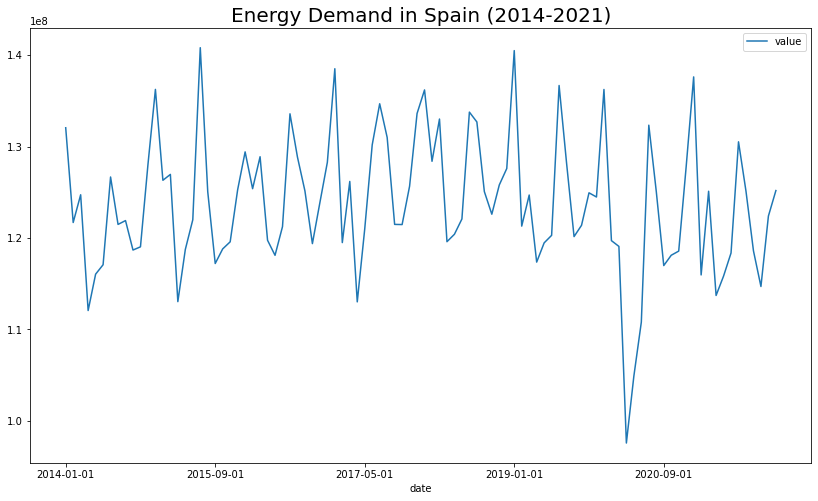

In [8]:
energy_demand_monthly.plot(figsize=(14,8))
plt.title("Energy Demand in Spain (2014-2021)", size = 20)
plt.show()

Podemos ver en esta representación cómo la demanda de energía oscila de forma periódica a lo largo del tiempo con unos máximos y mínimos dentro de un margen bien definido entre (1.1-1.4)*10^8 Mwh, excepto en 2020 donde vemos una caída abrupta que coincide con la irrupción del COVID-19 en España y el inicio del confinamiento estricto que duró casi 3 meses. Después podemos ver cómo remonta la demanda de energía coincidiendo con la vuelta a cierta normalidad. 

Podemos intuir que el pico máximo cada año se produce a principios de año y en los meses de verano debido a la mayor necesidad de energía en los hogares para calefacción o aire acondicionado. Por otra parte, los meses de menor consumo son los correspondientes a los meses de primaver y otoño.

Vamos a ver cómo se distribuye la demanda de energía por año y mes en el intervalo de tiempo que tratamos. La demanda por año nos permite ver una tendencia a lo largo del tiempo, mientras que la demanda por mes nos permite ver si hay estacionalidad.

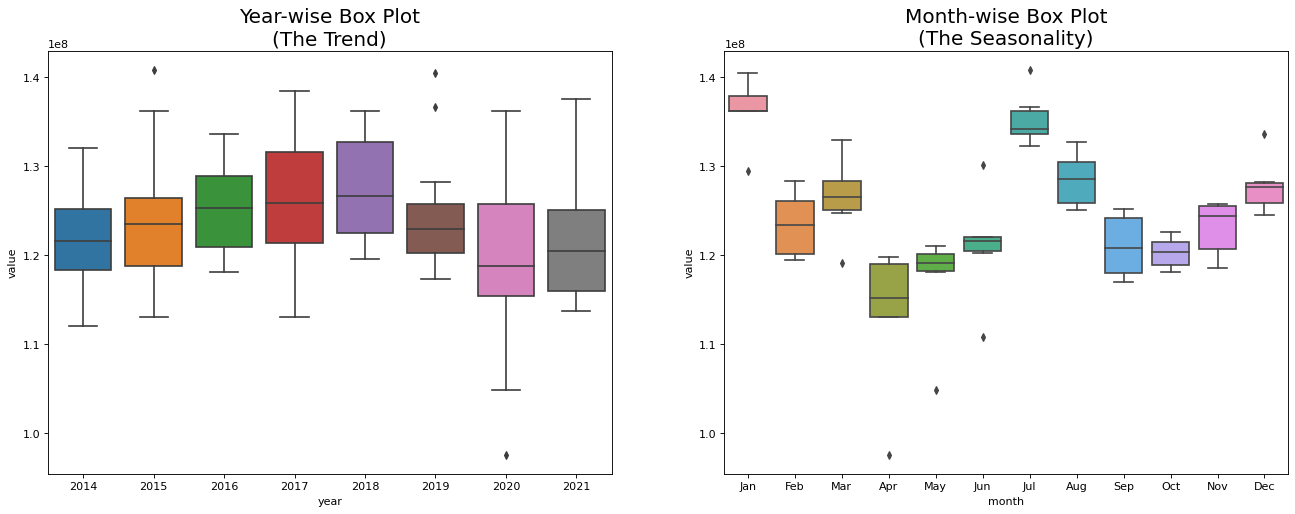

In [9]:
import matplotlib as mpl
import seaborn as sns

# Import Data
df = pd.read_csv('demanda_electrica_month.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([2014, 2021]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

En el primer gráfico, podemos ver cómo la media de la demanda de energía cada año sube hasta llegar al año 2018, a partir del cual se produce un descenso bastante notable en 2019 para caer aún más en 2020 y volver a remontar en 2021, aunque todavía bastante por debajo de 2018 y los años anteriores.

En el segundo gráfico confirmamos lo que habíamos dicho antes: los mayores consumos se producen en los meses de invierno (diciembre-marzo) y verano (julio-agosto), mientras que los de menor consumo se corresponden con los meses de primavera (abril-junio) y otoño (septiembre-noviembre).

In [10]:
# TODO: repetir los gráficos excluyendo 2020-2021 por ser años anómalos para ver cómo afecta a la estacionalidad ?¿

# TODO: poner conclusiones de tipo social o climático en los años? 
## (posible reducción de consumo por carestía de la vida o años de temperaturas más suaves)?¿

Vamos a ver una comparativa de la demanda energética por año de forma superpuesta.

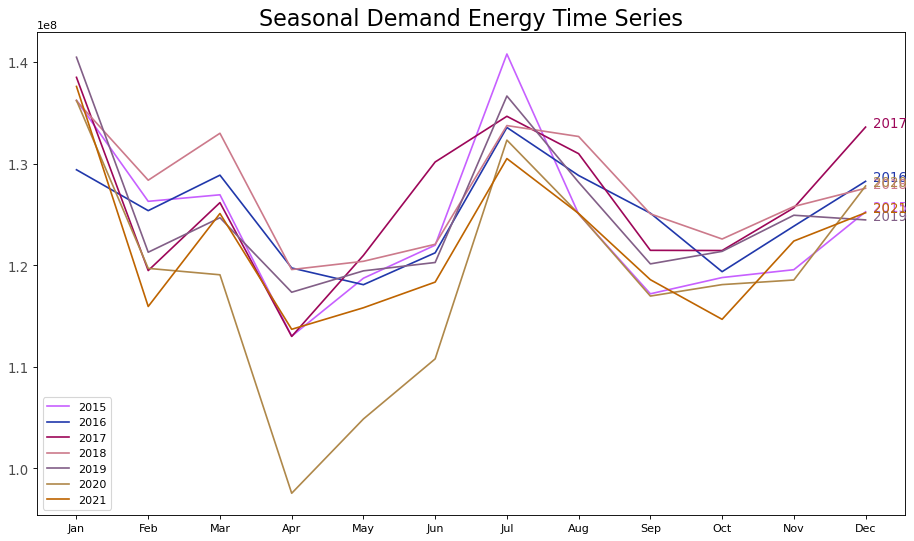

In [11]:
# Import Data
df = pd.read_csv('demanda_electrica_month.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(14, 8), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Demand Energy Time Series", fontsize=20)
plt.legend()
plt.show()

Podemos ver a nivel general cómo cada año se repiten los patrones de demanda de energía en los mismos meses.

Destaca 2015 con el máximo valor registrado en la serie en el mes de julio, mientras que el valor mínimo aparece en abril de 2020.

En 2017 podemos ver cómo una vez alcanzado el mínimo en abril, la demanda de energía crece de forma rápida manteniendo valores muy cercanos en los meses de junio, julio y agosto, lo que nos puede indicar que fue un año bastante caluroso y no solo en julio, como viene siendo habitual en el resto de años. En ese aspecto, también destaca 2018 por tener un consumo muy parecido entre julio y agosto.

In [12]:
# pasos a seguir:
## histograma donde se sume las temperaturas por meses para confirmar los meses de mayor consumo
### hacer prueba de quitar 2020 y 2021 por ser años anómalos? solo 2020?

## análisis por día
### comenzamos con una semana normal sin festivos
### elegir una semana con algún festivo, puente, etc
### incluir temperatura (semana, mes, año)?¿

## estacionaria/no-estacionaria
## ACF/PACF
## Holt-Winters de prueba

### Análisis diario

Vamos a pasar a analizar el comportamiento que tiene la demanda por día. Para ello, vamos a usar el dataset que hemos preparado con la distribución de la demanda por hora y al que se le ha añadido qué día de la semana es y si es festivo:

In [13]:
energy_demand_hourly = pd.read_csv('demanda_electrica_hora_weekday.csv')

In [15]:
energy_demand_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         70128 non-null  object 
 1   hour         70128 non-null  int64  
 2   value        70128 non-null  float64
 3   weekday      70128 non-null  int64  
 4   working_day  70128 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.7+ MB


In [18]:
energy_demand_hourly.head(48)

,date,hour,value,weekday,working_day
0,2014-01-01,0,145810.0,2,0
1,2014-01-01,1,140192.0,2,0
2,2014-01-01,2,130035.0,2,0
3,2014-01-01,3,121152.0,2,0
4,2014-01-01,4,115324.0,2,0
5,2014-01-01,5,113727.0,2,0
6,2014-01-01,6,114132.0,2,0
7,2014-01-01,7,115774.0,2,0
8,2014-01-01,8,115790.0,2,0
9,2014-01-01,9,116690.0,2,0
